### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### X és y inicializálása

In [2]:
X = np.array([1, 2, 3, 4, 5, 6])
y = np.array([3.3, 4.2, 5.4, 6.1, 7.3, 8.2])

In [3]:
X = pd.Series(X)
y = pd.Series(y)

Xy = {'X': X, 'y': y}

df = pd.DataFrame(Xy)
df

,X,y
0,1,3.3
1,2,4.2
2,3,5.4
3,4,6.1
4,5,7.3
5,6,8.2


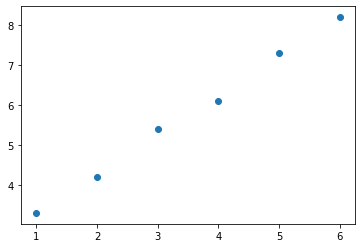

In [4]:
plt.scatter(df.X, df.y)

### Optimális egyenes manuális keresése (B0 = 2, B1 = 1.1)

In [5]:
def egyenes(b0, b1, x):
    return b0 + b1*x

egyenes = egyenes(2, 1.1, df.X)
egyenes

0    3.1
1    4.2
2    5.3
3    6.4
4    7.5
5    8.6
Name: X, dtype: float64

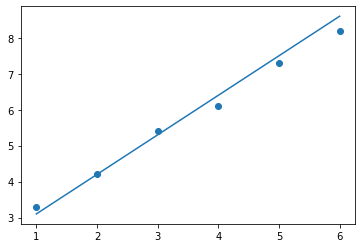

In [6]:
plt.scatter(df.X, df.y)
plt.plot(df.X, egyenes)
#B0 = 2, B1 = 1.1

In [31]:
hiba_tomb = []

for i in range(len(X)):
    hiba = 0
    for j in range(len(X)):
        hiba += ((i-1) + 1.1*df.X[j] - y[j])**2
    hiba_tomb.append(hiba)
    
hiba_tomb

[50.73999999999999,
 21.93999999999999,
 5.139999999999996,
 0.34000000000000197,
 7.540000000000009,
 26.740000000000016]

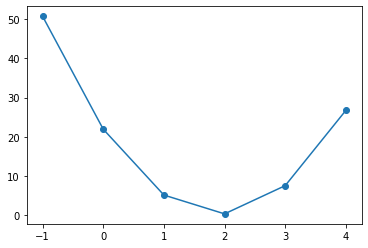

In [24]:
plt.scatter(X-2, hiba_tomb)
plt.plot(X-2, hiba_tomb)

### 0. Kezdő állapot (B0 = -1, B1 = 1.1)

In [7]:
B0 = -1
B1 = 1.1

In [8]:
def egyenes(b0, b1, x):
    return b0 + b1*x

egyenes_tipp = egyenes(B0, B1, df.X)
egyenes_tipp

0    0.1
1    1.2
2    2.3
3    3.4
4    4.5
5    5.6
Name: X, dtype: float64

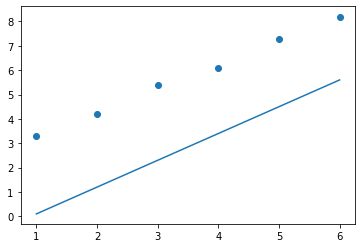

In [9]:
plt.scatter(df.X, df.y)
plt.plot(df.X, egyenes_tipp)
#B0 = 0, B1 = 1.1

#### jelenlegi hiba = 50.74

In [10]:
hiba_B0 = 0

for i in range(len(X)):
    hiba_B0 += (B0 + B1*df.X[i] - y[i])**2
    
hiba_B0

50.73999999999999

### 1. iteráció

#### B0 = -1 pontban a hiba parabola függvény meredeksége: -34.8

In [14]:
derivalt_hiba = 0

for i in range(len(X)):
    print(2*(B0 + B1*X[i] - y[i]))
    derivalt_hiba += 2*(B0 + B1*X[i] - y[i])
    
print('SUM Derivált hiba: ', derivalt_hiba)

-6.3999999999999995
-6.0
-6.2
-5.399999999999999
-5.6
-5.1999999999999975
SUM Derivált hiba:  -34.79999999999999


In [15]:
B0 = B0 - derivalt_hiba * 0.1
print('Új B0: ', B0)

Új B0:  2.479999999999999


#### B0 = 2,48, B1 = 1.1

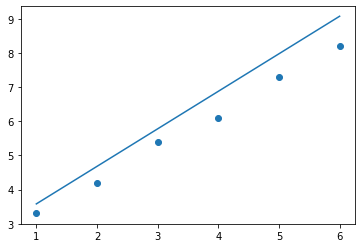

In [16]:
egyenes_tipp = egyenes(B0, B1, df.X)
egyenes_tipp

plt.scatter(df.X, df.y)
plt.plot(df.X, egyenes_tipp)

In [25]:
hiba_B0 = 0

for i in range(len(X)):
    hiba_B0 += (B0 + B1*df.X[i] - y[i])**2
    
hiba_B0

0.280129177600001

### 2. iteráció

#### B0 = 2,48 pontban a hiba parabola függvény meredeksége: 6,96

In [17]:
derivalt_hiba = 0

for i in range(len(X)):
    print(2*(B0 + B1*X[i] - y[i]))
    derivalt_hiba += 2*(B0 + B1*X[i] - y[i])
    
print('SUM Derivált hiba: ', derivalt_hiba)

0.5599999999999987
0.9599999999999991
0.759999999999998
1.5599999999999987
1.3599999999999977
1.7600000000000016
SUM Derivált hiba:  6.959999999999994


In [18]:
B0 = B0 - derivalt_hiba * 0.1
print('Új B0: ', B0)

Új B0:  1.7839999999999998


#### B0 = 1,78, B1 = 1.1

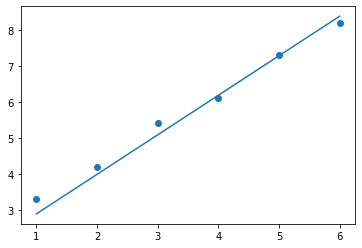

In [19]:
egyenes_tipp = egyenes(B0, B1, df.X)
egyenes_tipp

plt.scatter(df.X, df.y)
plt.plot(df.X, egyenes_tipp)

In [26]:
hiba_B0 = 0

for i in range(len(X)):
    hiba_B0 += (B0 + B1*df.X[i] - y[i])**2
    
hiba_B0

0.280129177600001

### 3. iteráció

#### B0 = 1,78 pontban a hiba parabola függvény meredeksége: -1,39

In [20]:
derivalt_hiba = 0

for i in range(len(X)):
    print(2*(B0 + B1*X[i] - y[i]))
    derivalt_hiba += 2*(B0 + B1*X[i] - y[i])
    
print('SUM Derivált hiba: ', derivalt_hiba)

B0 = B0 - derivalt_hiba * 0.1
print('Új B0: ', B0)

-0.8319999999999999
-0.4320000000000004
-0.6320000000000014
0.16800000000000104
-0.03200000000000003
0.3680000000000021
SUM Derivált hiba:  -1.3919999999999986
Új B0:  1.9231999999999996


#### B0 = 1,92, B1 = 1.1

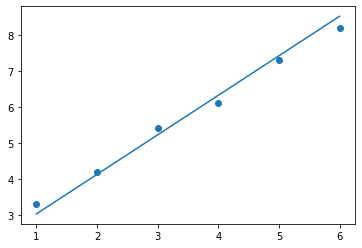

In [21]:
egyenes_tipp = egyenes(B0, B1, df.X)
egyenes_tipp

plt.scatter(df.X, df.y)
plt.plot(df.X, egyenes_tipp)

In [27]:
hiba_B0 = 0

for i in range(len(X)):
    hiba_B0 += (B0 + B1*df.X[i] - y[i])**2
    
hiba_B0

0.280129177600001

### 4. iteráció

#### B0 = 1,92 pontban a hiba parabola függvény meredeksége: 0,28

-0.5536000000000003
-0.15360000000000085
-0.35360000000000014
0.4464000000000006
0.2463999999999995
0.6463999999999999
SUM Derivált hiba:  0.27839999999999865
Új B0:  1.8953599999999997


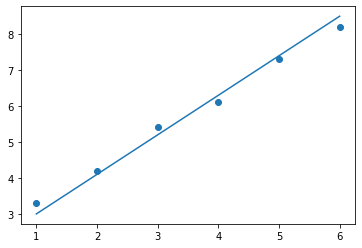

In [22]:
derivalt_hiba = 0

for i in range(len(X)):
    print(2*(B0 + B1*X[i] - y[i]))
    derivalt_hiba += 2*(B0 + B1*X[i] - y[i])
    
print('SUM Derivált hiba: ', derivalt_hiba)

B0 = B0 - derivalt_hiba * 0.1
print('Új B0: ', B0)

egyenes_tipp = egyenes(B0, B1, df.X)
egyenes_tipp

plt.scatter(df.X, df.y)
plt.plot(df.X, egyenes_tipp)
#B0 = 2,48, B1 = 1.1

In [28]:
hiba_B0 = 0

for i in range(len(X)):
    hiba_B0 += (B0 + B1*df.X[i] - y[i])**2
    
hiba_B0

0.280129177600001